# Practice Lab: Neural Networks for Handwritten Digit Recognition, Multiclass

In this exercise, you will use a neural network to recognize the hand-written digits 0-9.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - ReLU Activation](#2)
- [ 3 - Softmax Function](#3)
  - [ Exercise 1](#ex01)
- [ 4 - Neural Networks](#4)
  - [ 4.1 Problem Statement](#4.1)
  - [ 4.2 Dataset](#4.2)
  - [ 4.3 Model representation](#4.3)
  - [ 4.4 Tensorflow Model Implementation](#4.4)
  - [ 4.5 Softmax placement](#4.5)
    - [ Exercise 2](#ex02)


<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
#%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU).
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

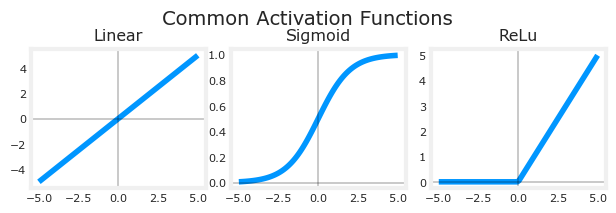

In [16]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.     
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? This enables multiple units to contribute to to the resulting function without interfering.

<a name="3"></a>
## 3 - Softmax Function
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
<center>  <img  src="./images/C2_W2_NNSoftmax.png" width="600" />  

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

<a name="ex01"></a>
### Exercise 1
Let's create a NumPy implementation:

In [17]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):
    ### START CODE HERE ###
    a = np.exp(z) / np.sum(np.exp(z))
    ### END CODE HERE ###
    return a

In [18]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST
test_my_softmax(my_softmax)
# END UNIT TEST

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


Below, vary the values of the `z` inputs. Note in particular how the exponential in the numerator magnifies small differences in the values. Note as well that the output values sum to one.

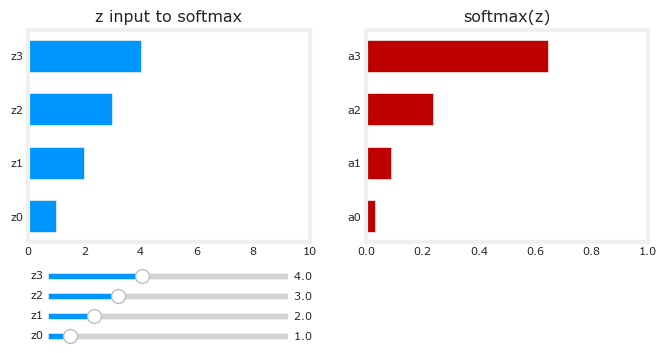

In [19]:
plt.close("all")
plt_softmax(my_softmax)

<a name="4"></a>
## 4 - Neural Networks

In last weeks assignment, you implemented a neural network to do binary classification. This week you will extend that to multiclass classification. This will utilize the softmax activation.


<a name="4.1"></a>
### 4.1 Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.


<a name="4.2"></a>
### 4.2 Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
        - Each training examples becomes a single row in our data matrix `X`.
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [20]:
from keras_preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def generate_selected_classes(num_classes):
    selected_classes = list(range(num_classes))
    return selected_classes

# Example usage:
num_classes = 50  # Change this to the number of classes you want
selected_classes = generate_selected_classes(num_classes)

df = pd.read_csv('birds.csv')
df_subset = df[df['class id'].isin(selected_classes)]

file_paths = df_subset['filepaths'].tolist()
labels = df_subset['labels'].tolist()

def preprocess_image(file_path):
    img = load_img(file_path, target_size=(32, 32))
    img_array = img_to_array(img)
    # Add additional preprocessing steps if needed
    return img_array

X_original = np.array([preprocess_image(file_path) for file_path in file_paths])
X_original = X_original / 255
y_original = np.array(labels)

X_combined = X_original
y_combined = y_original


# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Generate augmented images
augmented_images = []

for original_image in X_original:
    original_image = original_image.reshape((1,) + original_image.shape)
    for batch in datagen.flow(original_image, batch_size=1):
        augmented_images.append(batch[0])
        break  # Break to ensure only one augmented image is generated per original image

X_augmented = np.array(augmented_images)
y_augmented = np.array(labels * len(datagen.flow(original_image)))  # Duplicate labels for augmented images

# Combine original and augmented data
X_combined = np.vstack((X_original, X_augmented))
y_combined = np.hstack((y_original, y_augmented))

# Now, X_combined and y_combined contain both original and augmented data

#### 4.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints the first element in the variables `X` and `y`.  

In [21]:
print ('The first element of X is: ', X_combined[0])

The first element of X is:  [[[0.92 0.92 0.87]
  [0.89 0.9  0.84]
  [0.84 0.85 0.77]
  ...
  [0.97 0.94 0.87]
  [0.95 0.92 0.82]
  [0.34 0.3  0.2 ]]

 [[0.91 0.92 0.85]
  [0.9  0.89 0.82]
  [0.87 0.85 0.79]
  ...
  [0.99 0.95 0.91]
  [0.98 0.95 0.91]
  [0.95 0.93 0.86]]

 [[0.91 0.89 0.86]
  [0.9  0.86 0.82]
  [0.87 0.81 0.79]
  ...
  [0.97 0.94 0.86]
  [0.81 0.8  0.72]
  [0.74 0.73 0.65]]

 ...

 [[0.84 0.85 0.77]
  [0.88 0.88 0.81]
  [0.83 0.82 0.74]
  ...
  [0.18 0.18 0.16]
  [0.18 0.18 0.18]
  [0.15 0.15 0.16]]

 [[0.65 0.71 0.49]
  [0.35 0.32 0.22]
  [0.5  0.43 0.34]
  ...
  [0.16 0.15 0.07]
  [0.22 0.2  0.16]
  [0.17 0.17 0.18]]

 [[0.48 0.59 0.23]
  [0.42 0.42 0.27]
  [0.51 0.44 0.37]
  ...
  [0.98 0.97 0.92]
  [0.19 0.19 0.19]
  [0.17 0.18 0.16]]]


In [22]:
print ('The first element of y is: ', y_combined[0])
print ('The last element of y is: ', y_combined[-1])

The first element of y is:  ABBOTTS BABBLER
The last element of y is:  AZURE TANAGER


#### 4.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [23]:
print ('The shape of X is: ' + str(X_combined.shape))
print ('The shape of y is: ' + str(y_combined.shape))

The shape of X is: (16884, 32, 32, 3)
The shape of y is: (16884,)


#### 4.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

Text(0.5, 0.98, 'Label, image')

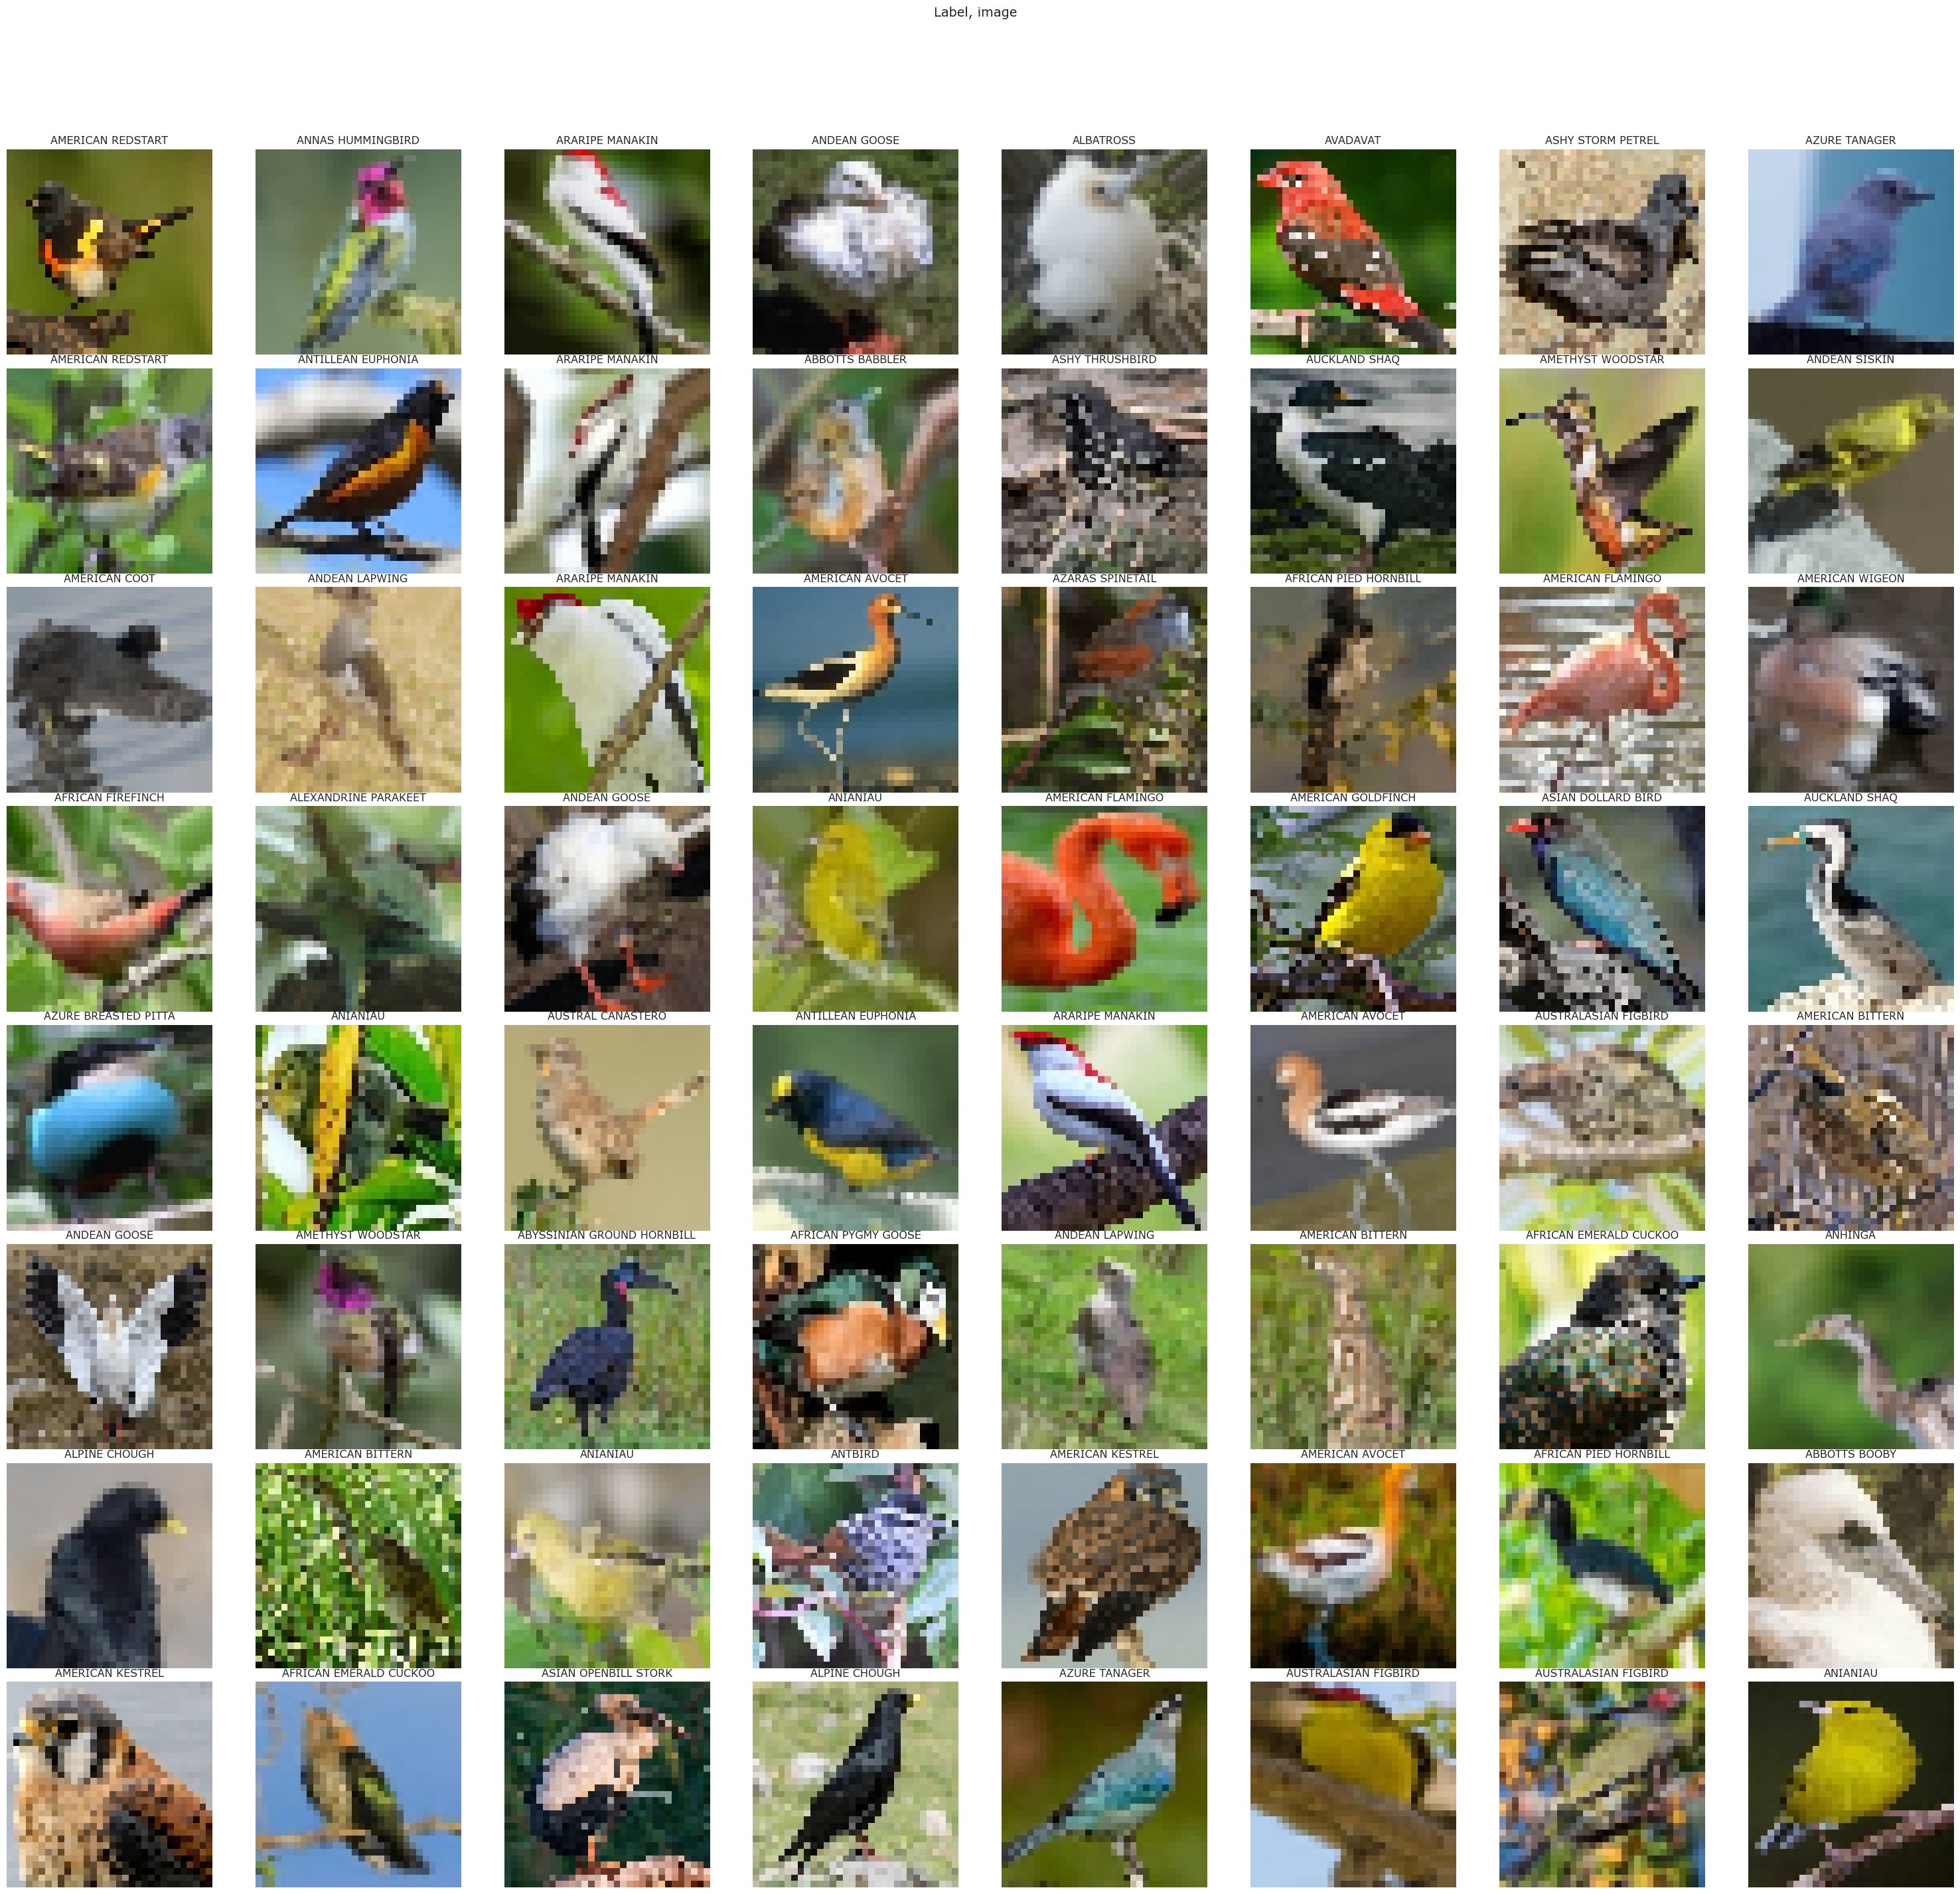

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, height, width, channels = X_combined.shape  # Unpack the dimensions

fig, axes = plt.subplots(8, 8, figsize=(30, 30))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  # [left, bottom, right, top]

widgvis(fig)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X_combined[random_index].reshape((height, width, channels))

    # Display the image
    ax.imshow(X_random_reshaped)

    # Display the label above the image
    ax.set_title(y_combined[random_index])
    ax.set_axis_off()

fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below.
- This has two dense layers with ReLU activations followed by an output layer with a linear activation.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W2_Assigment_NN.png" width="600" height="450">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention:
               

<a name="4.4"></a>
### 4.4 Tensorflow Model Implementation


Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below.
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

<a name="4.5"></a>
### 4.5 Softmax placement
As described in the lecture, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation.
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

<a name="ex02"></a>
### Exercise 2

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described above.

In [25]:
# UNQ_C2
# GRADED CELL: Sequential model
num_classes = len(np.unique(y_combined))
print(num_classes)
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
        ### END CODE HERE ###
    ], name = "my_model"
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

50


In [26]:
# UNQ_C2
# GRADED CELL: Sequential model
num_classes = len(np.unique(y_combined))
print(num_classes)
tf.random.set_seed(1234) # for consistent results
model2 = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
        ### END CODE HERE ###
    ], name = "my_model"
)
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

50


In [27]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 64)                416

The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [28]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_combined)
y_encoded = y_encoded.astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_valid, y_valid)
)

Epoch 1/200
423/423 [==============================] - 8s 17ms/step - loss: 3.8014 - accuracy: 0.0389 - val_loss: 3.5971 - val_accuracy: 0.0486
Epoch 2/200
423/423 [==============================] - 7s 17ms/step - loss: 3.3921 - accuracy: 0.0862 - val_loss: 3.4812 - val_accuracy: 0.1055
Epoch 3/200
423/423 [==============================] - 8s 19ms/step - loss: 3.1781 - accuracy: 0.1322 - val_loss: 3.3263 - val_accuracy: 0.1037
Epoch 4/200
423/423 [==============================] - 8s 19ms/step - loss: 3.0796 - accuracy: 0.1476 - val_loss: 3.1322 - val_accuracy: 0.1410
Epoch 5/200
423/423 [==============================] - 9s 22ms/step - loss: 3.0004 - accuracy: 0.1652 - val_loss: 3.0152 - val_accuracy: 0.1718
Epoch 6/200
423/423 [==============================] - 8s 19ms/step - loss: 2.9380 - accuracy: 0.1778 - val_loss: 2.9502 - val_accuracy: 0.1759
Epoch 7/200
423/423 [==============================] - 8s 19ms/step - loss: 2.8839 - accuracy: 0.1927 - val_loss: 2.9301 - val_accuracy:

In [29]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

model2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history2 = model2.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_valid, y_valid)
)

Epoch 1/200
423/423 [==============================] - 1s 2ms/step - loss: 3.8125 - accuracy: 0.0355 - val_loss: 3.7308 - val_accuracy: 0.0314
Epoch 2/200
423/423 [==============================] - 1s 2ms/step - loss: 3.6465 - accuracy: 0.0418 - val_loss: 3.6549 - val_accuracy: 0.0373
Epoch 3/200
423/423 [==============================] - 1s 2ms/step - loss: 3.5525 - accuracy: 0.0562 - val_loss: 3.5664 - val_accuracy: 0.0586
Epoch 4/200
423/423 [==============================] - 1s 2ms/step - loss: 3.5071 - accuracy: 0.0587 - val_loss: 3.5258 - val_accuracy: 0.0539
Epoch 5/200
423/423 [==============================] - 1s 2ms/step - loss: 3.4868 - accuracy: 0.0592 - val_loss: 3.5140 - val_accuracy: 0.0545
Epoch 6/200
423/423 [==============================] - 1s 2ms/step - loss: 3.4692 - accuracy: 0.0655 - val_loss: 3.4956 - val_accuracy: 0.0610
Epoch 7/200
423/423 [==============================] - 1s 2ms/step - loss: 3.4666 - accuracy: 0.0643 - val_loss: 3.5010 - val_accuracy: 0.0628

#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 100. This specifies that the entire data set should be applied during training 100 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/100
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
The first line, `Epoch 1/100`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Loss  (cost)
In course 1, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, you saw the loss displayed each epoch as `model.fit` was executing. The [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns a variety of metrics including the loss. This is captured in the `history` variable above. This can be used to examine the loss in a plot as shown below.

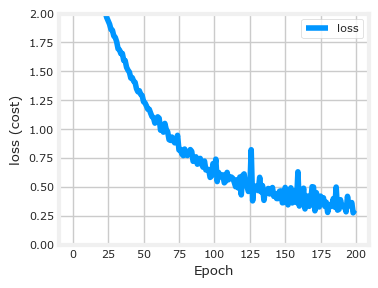

In [30]:
plot_loss_tf(history)

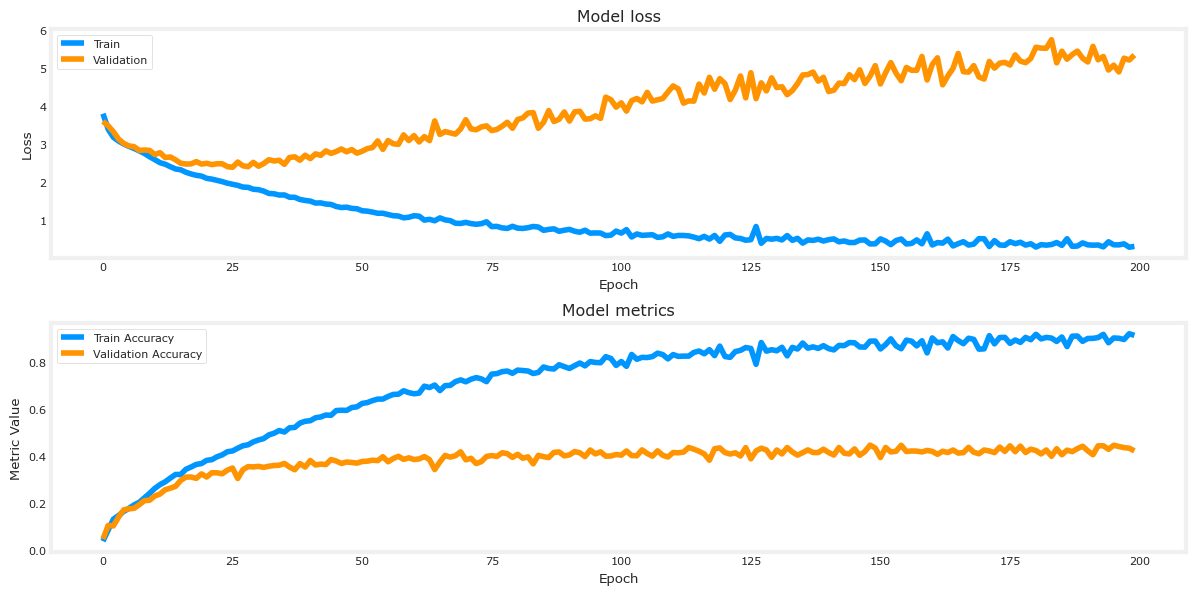

In [31]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy and F1 score values
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model metrics')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'F1 Score'], loc='upper left')

plt.tight_layout()
plt.show()

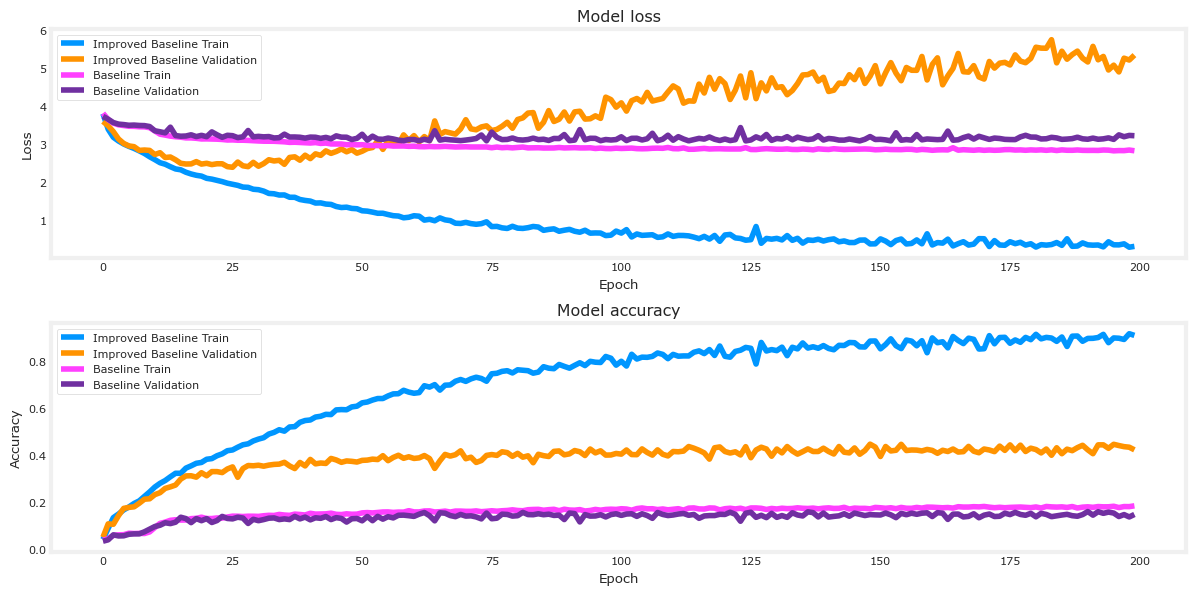

In [32]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Improved Baseline Train', 'Improved Baseline Validation', 'Baseline Train', 'Baseline Validation'], loc='upper left')

# Plot training & validation accuracy and F1 score values
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Improved Baseline Train', 'Improved Baseline Validation', 'Baseline Train', 'Baseline Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

53/53 [==============================] - 0s 8ms/step - loss: 5.1047 - accuracy: 0.4281
Test accuracy: 0.42806392908096313


In [34]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

53/53 [==============================] - 0s 2ms/step - loss: 3.2458 - accuracy: 0.1421
Test accuracy: 0.1420959085226059


53/53 [==============================] - 0s 6ms/step


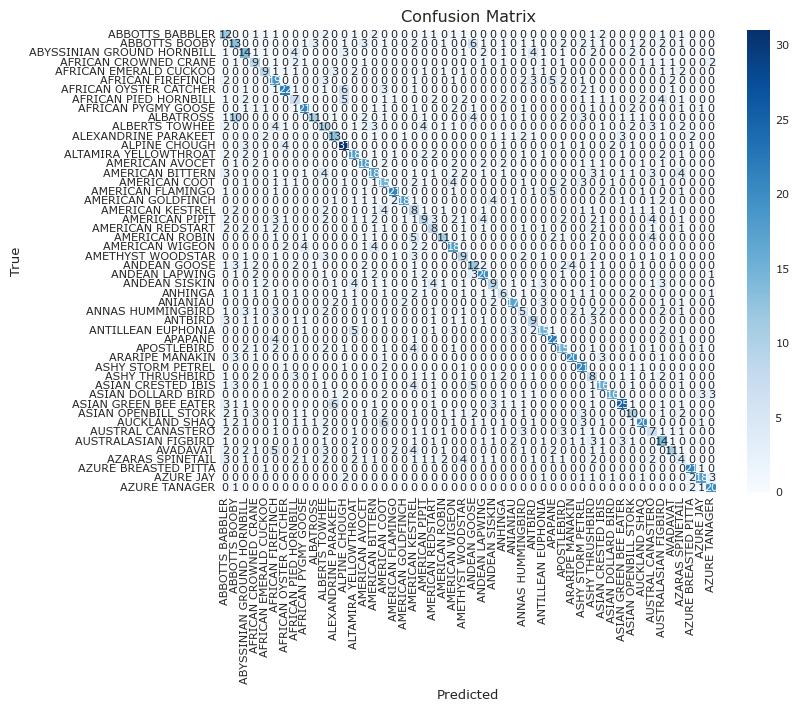

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your labels are one-hot encoded
# Assuming your labels are not one-hot encoded
y_true = np.array(y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Convert y_true to a 1D array or list
y_true = np.array(y_true)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

class_labels = label_encoder.classes_

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

53/53 [==============================] - 0s 1ms/step


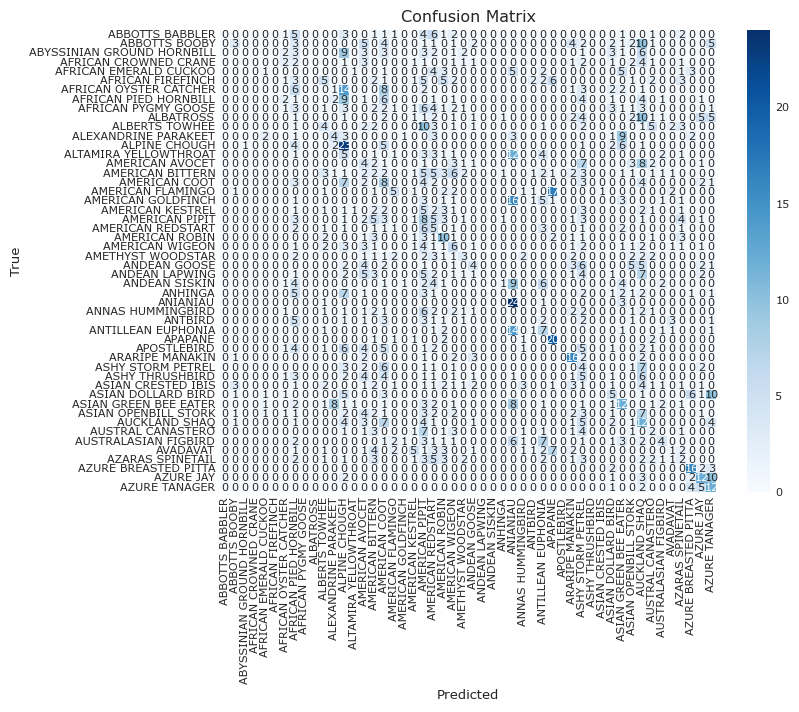

In [36]:
# Assuming your labels are one-hot encoded
# Assuming your labels are not one-hot encoded
y_true = np.array(y_test)
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Convert y_true to a 1D array or list
y_true = np.array(y_true)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

class_labels = label_encoder.classes_

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

53/53 [==============================] - 0s 6ms/step


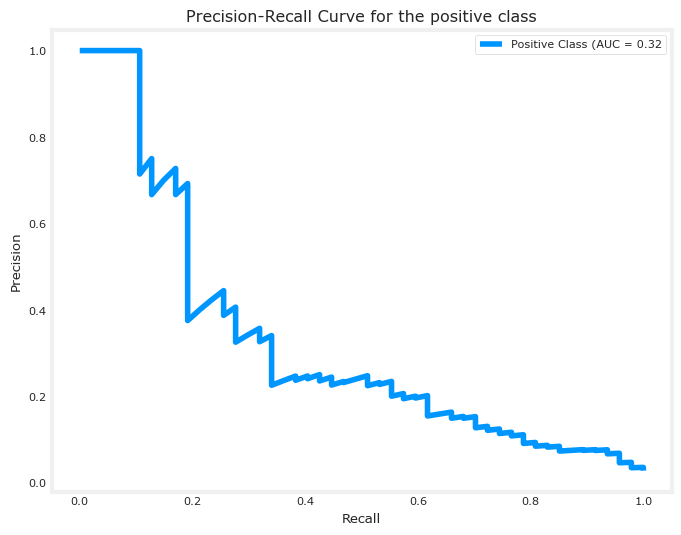

In [37]:
from sklearn.metrics import precision_recall_curve, auc

# Assuming you have a TensorFlow model named 'model'
y_scores = model.predict(X_test)[:, 1]  # Replace with the appropriate method for your model

# Rest of the code for precision-recall curve
from sklearn.preprocessing import label_binarize

# Convert multiclass labels to binary form
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

# Calculate precision-recall curve for the positive class
precision, recall, _ = precision_recall_curve(y_true_bin[:, 1], y_scores)
pr_auc = auc(recall, precision)

# Plot precision-recall curve for the positive class
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Positive Class (AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for the positive class')
plt.legend()
plt.show()

53/53 [==============================] - 0s 2ms/step


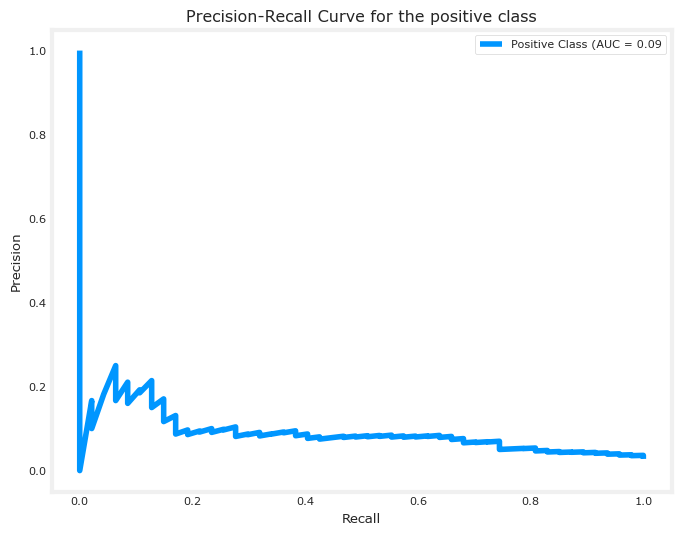

In [38]:
# Assuming you have a TensorFlow model named 'model'
y_scores = model2.predict(X_test)[:, 1]  # Replace with the appropriate method for your model

# Rest of the code for precision-recall curve
from sklearn.preprocessing import label_binarize

# Convert multiclass labels to binary form
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

# Calculate precision-recall curve for the positive class
precision, recall, _ = precision_recall_curve(y_true_bin[:, 1], y_scores)
pr_auc = auc(recall, precision)

# Plot precision-recall curve for the positive class
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Positive Class (AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for the positive class')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import f1_score

# Assuming your labels are one-hot encoded
y_true = np.array(y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Convert y_true to a 1D array or list
y_true = np.array(y_true)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')  # You can change the 'average' parameter if needed

print(f'Weighted F1 score: {f1:.4f}')

53/53 [==============================] - 0s 6ms/step
Weighted F1 score: 0.4301


In [40]:
y_true = np.array(y_test)
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Convert y_true to a 1D array or list
y_true = np.array(y_true)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')  # You can change the 'average' parameter if needed

print(f'Weighted F1 score: {f1:.4f}')

53/53 [==============================] - 0s 2ms/step
Weighted F1 score: 0.1068
